In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import acp_functions1 as acp_functions

In [2]:
df = pd.read_excel("donnee_copy.xlsx")
df

,yeux,Chatains,Roux,Blonds
0,Marrons,119,26,7
1,Noisette,54,14,10
2,Verts,29,14,16
3,Bleus,84,17,94


In [3]:
hair_colors = list(df.columns)[1:]
eye_colors = df['yeux']

In [4]:
X = df[hair_colors].values

In [5]:
#calcul du profil ligne
row_sum = np.sum(X, axis=1)
column_sum=np.sum(X,axis=0)
row_profile = X/row_sum[:,np.newaxis]
columns_profile=X/column_sum

print(row_sum)
#affichage
print("profil ligne: ")
print(pd.DataFrame(row_profile, index=eye_colors, columns=hair_colors))
print("profil colonne: ")
print(pd.DataFrame(columns_profile, index=eye_colors, columns=hair_colors))

[152  78  59 195]
profil ligne: 
          Chatains      Roux    Blonds
yeux                                  
Marrons   0.782895  0.171053  0.046053
Noisette  0.692308  0.179487  0.128205
Verts     0.491525  0.237288  0.271186
Bleus     0.430769  0.087179  0.482051
profil colonne: 
          Chatains      Roux    Blonds
yeux                                  
Marrons   0.416084  0.366197  0.055118
Noisette  0.188811  0.197183  0.078740
Verts     0.101399  0.197183  0.125984
Bleus     0.293706  0.239437  0.740157


In [6]:
rows_sum_frequences=row_sum/np.sum(X)
columns_sum_frequences=column_sum/np.sum(X)

In [7]:
DK=np.diag(rows_sum_frequences)
DL=np.diag(columns_sum_frequences)
#Déterminons la matrice F

F=X/np.sum(X)

print("Dk", DK)
print("DL", DL)
print("F", F)


Dk [[0.31404959 0.         0.         0.        ]
 [0.         0.16115702 0.         0.        ]
 [0.         0.         0.12190083 0.        ]
 [0.         0.         0.         0.40289256]]
DL [[0.59090909 0.         0.        ]
 [0.         0.14669421 0.        ]
 [0.         0.         0.26239669]]
F [[0.24586777 0.05371901 0.01446281]
 [0.11157025 0.02892562 0.02066116]
 [0.05991736 0.02892562 0.03305785]
 [0.17355372 0.03512397 0.19421488]]


In [8]:
#calcul de la matrice L_barre
L=np.linalg.inv(DK)@F
C=np.linalg.inv(DL)@np.transpose(F)
L_barre=np.reshape(np.sum(F, axis=0),(-1,1))
C_barre=np.reshape(np.sum(F,axis=1),(-1,1))

#calcul de la matrice Lc: la matrice centrée

Lc=L-acp_functions.matrix_of_one(DK.shape[0])@np.transpose(L_barre)
Cc=C-acp_functions.matrix_of_one(DL.shape[0])@np.transpose(C_barre)

(4, 3)
(3, 3)
(4, 4)


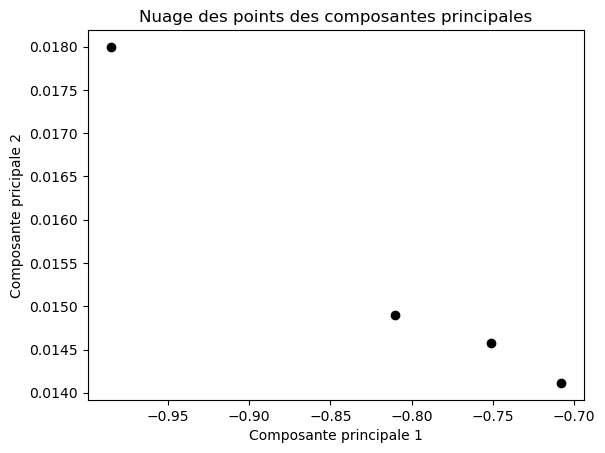

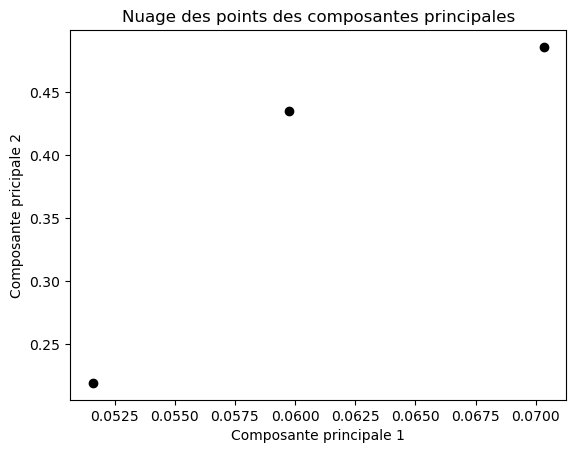

In [9]:
print(Lc.shape)
print(DL.shape)
print(DK.shape)

acp_functions.completed_pca(Lc,np.linalg.inv(DL),np.linalg.inv(DK))
acp_functions.completed_pca(Cc,np.linalg.inv(DK),np.linalg.inv(DL))